# Movie Data Analysis

In [61]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
df = pd.read_csv('/Users/admin/Downloads/movies_data.csv')
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [14]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 442.2+ KB


In [16]:
#Checking number of null values
df.isnull().sum() 

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [17]:
#Duplicate data in our dataset
df.duplicated().sum()

np.int64(0)

In [19]:
df.describe(include='object')

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
count,5659,5659,5659,5659,5659,5659
unique,5385,376,2431,1960,2321,2556
top,Baazi,Drama,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,844,41,104,52,57


In [24]:
df['Votes'].unique()

array([    8,    35,   827, ..., 70344,   408,  1496], shape=(2027,))

In [32]:
df['Votes'].max()

np.int64(591417)

In [33]:
count_1000 = (df['Votes']>1000).sum()
count_1000

np.int64(1368)

In [34]:
count_10000 = (df['Votes']>10000).sum()
count_10000

np.int64(343)

In [39]:
count_100 = (df['Votes']>100).sum()
count_100

np.int64(3063)

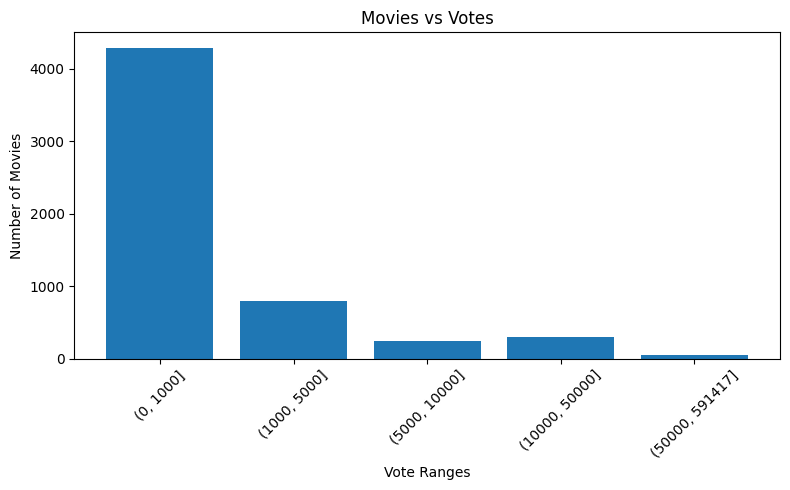

/var/folders/qf/9t7krrts2nbf4_6v5l4bwcxr0000gn/T/ipykernel_1712/2104963770.py:18: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(x_votes)


Votes
(0, 1000]          4291
(1000, 5000]        789
(10000, 50000]      293
(5000, 10000]       236
(50000, 591417]      50
Name: count, dtype: int64

In [70]:
# here maximum votes is 591417 and only 1368 movies have votes greater than 1000 votes 
# 343 movies have greater than 10000 votes
# Using Custom Ranges
bins = [0, 1000, 5000, 10000, 50000, df['Votes'].max()]

x_votes = pd.cut(df['Votes'], bins=bins)

vote_counts = x_votes.value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(vote_counts.index.astype(str), vote_counts.values)
plt.xlabel('Vote Ranges')
plt.ylabel('Number of Movies')
plt.title('Movies vs Votes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
pd.value_counts(x_votes)

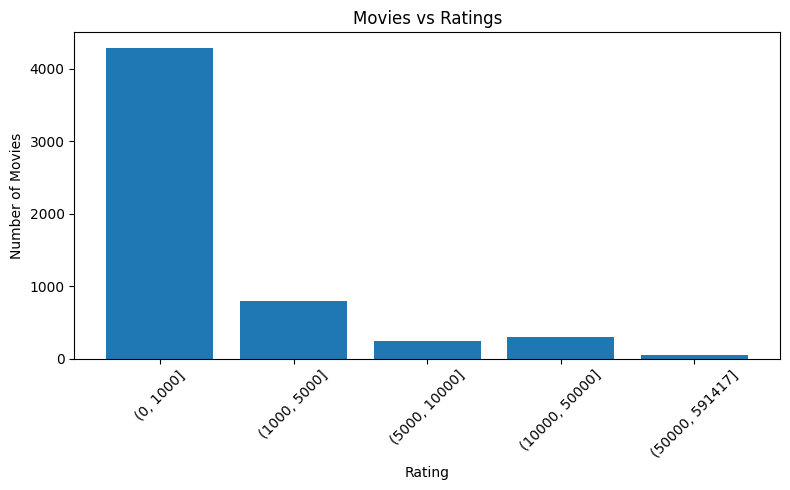

/var/folders/qf/9t7krrts2nbf4_6v5l4bwcxr0000gn/T/ipykernel_1712/2534114723.py:14: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(rating)


Rating
(6, 8]     2685
(4, 6]     2151
(2, 4]      599
(8, 10]     204
(0, 2]       20
Name: count, dtype: int64

In [68]:
cust_rat = [0,2,4,6,8,10]
rating = pd.cut(df['Rating'], bins=cust_rat)

vote_counts = x_votes.value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(vote_counts.index.astype(str), vote_counts.values)
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Movies vs Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
pd.value_counts(rating)

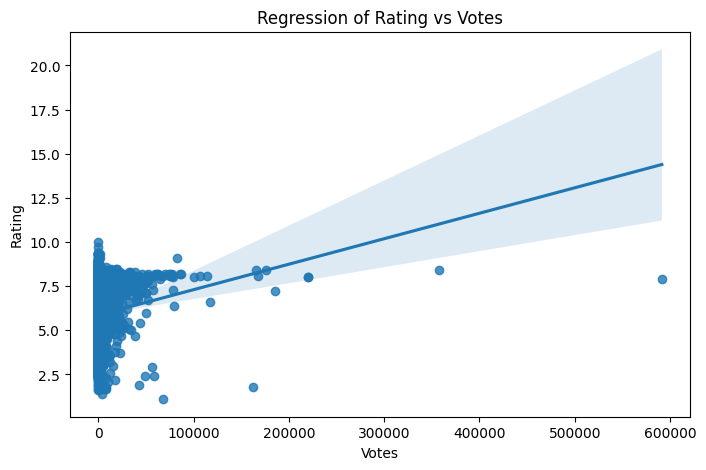

In [73]:
plt.figure(figsize=(8,5))
sns.regplot(x='Votes', y='Rating', data=df)
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Regression of Rating vs Votes')
plt.show()

In [74]:
# Positive Slope which indicates movie with higher votes tend to have high ratings

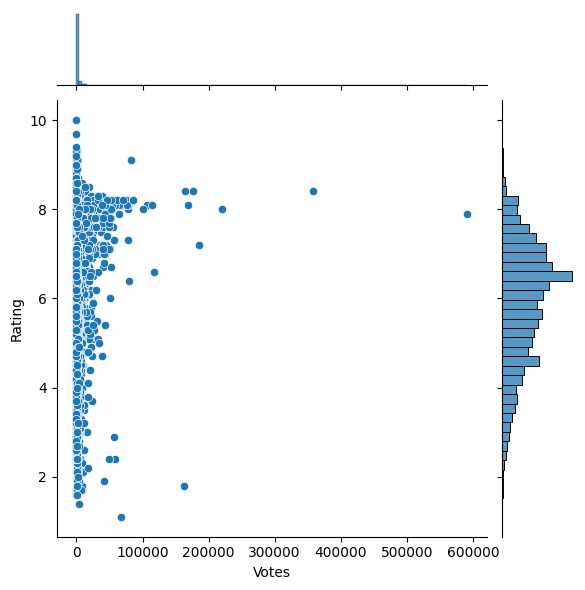

In [77]:
sns.jointplot(x = 'Votes',y = 'Rating',data=df)

In [78]:
''' 
Each Point Represents a Movie
Top Graph shows distribution of votes
Right Graph shows distribution of  Movies
'''

' \nEach Point Represents a Movie\nTop Graph shows distribution of votes\nRight Graph shows distribution of  Movies\nThus Confirming Evaluation that Higher no of votes equal to higher rating somewhat\n'

In [79]:
df.sort_values(by='Rating',ascending=False)[:20]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3146,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
2027,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2574,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
5165,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
1897,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
536,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
4783,Sindhustan,2019,64,"Documentary, Family, History",9.3,36,Sapna Bhavnani,Leila Advani,Laj Badlani,Chaho Bhara
3149,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
4609,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
4321,Refl3ct,2021,65,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


In [80]:
# Here the top has rting 10 but got only 5 votes whereas  Sorraarai Pottru got 83 thousand votes and still has rating 9.1
# The Dataset has values where low votes equal to high rating 

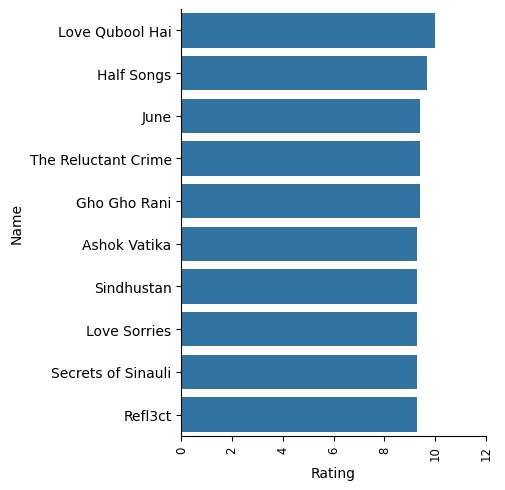

In [82]:
top_5 = df.sort_values(by='Rating',ascending=False)[:10]
snstop_5Plot = sns.catplot(y='Name',x='Rating',data=top_5,kind = 'bar')
snstop_5Plot.set_xticklabels(rotation =90 , fontsize='small')

In [83]:
#Highest Votes with Rating
df.sort_values(by='Votes',ascending=False)[:20]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3088,Life of Pi,2012,127,"Adventure, Drama, Fantasy",7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
44,3 Idiots,2009,170,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
3094,Lion,2016,118,"Biography, Drama",8.0,220526,Garth Davis,Dev Patel,Nicole Kidman,Rooney Mara
1823,Gandhi,1982,191,"Biography, Drama, History",8.0,220118,Richard Attenborough,Ben Kingsley,John Gielgud,Rohini Hattangadi
5096,The Darjeeling Limited,2007,91,"Adventure, Comedy, Drama",7.2,185127,Wes Anderson,Owen Wilson,Adrien Brody,Jason Schwartzman
3092,Like Stars on Earth,2007,165,"Drama, Family",8.4,175810,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan
4023,PK,2014,153,"Comedy, Drama, Musical",8.1,168150,Rajkumar Hirani,Aamir Khan,Anushka Sharma,Sanjay Dutt
1276,Dangal,2016,161,"Action, Biography, Drama",8.4,165074,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh
4200,Radhe,2021,135,"Action, Crime, Thriller",1.8,162455,Prabhu Deva,Salman Khan,Disha Patani,Randeep Hooda
1436,Dil Bechara,2020,101,"Comedy, Drama, Romance",6.6,117377,Mukesh Chhabra,Sushant Singh Rajput,Sanjana Sanghi,Sahil Vaid


In [84]:
'''
From this we can takeaway that higher votes tend to have great rating with Radhe being exception
'''

'\nFrom this we can takeaway that higher votes tend to have great rating with Radhe being exception\n'

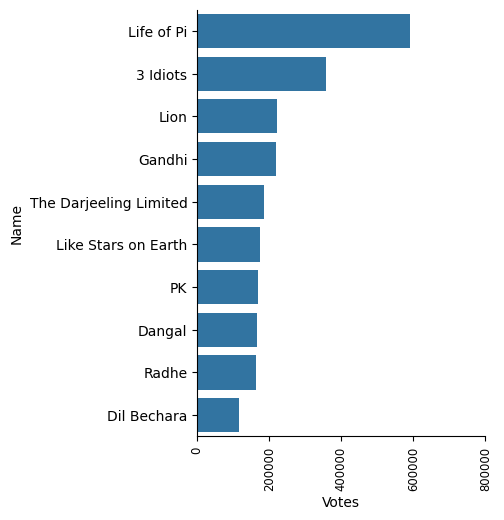

In [85]:
top_5v = df.sort_values(by='Votes',ascending=False)[:10]
snstop_5vPlot = sns.catplot(y='Name',x='Votes',data=top_5v,kind = 'bar')
snstop_5vPlot.set_xticklabels(rotation =90 , fontsize='small')

In [106]:
def sortYearWise(df,col):
    return df.sort_values(by=col,ascending=False)[:1]

yearWisetop_5rat = df.groupby('Year').apply(sortYearWise,'Rating')
yearWisetop_5rat

/var/folders/qf/9t7krrts2nbf4_6v5l4bwcxr0000gn/T/ipykernel_1712/4003536737.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearWisetop_5rat = df.groupby('Year').apply(sortYearWise,'Rating')


,,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Year,,,,,,,,,,,
1931,5144,The Light of the World,1931,124,"Drama, Fantasy",6.2,112,Ardeshir Irani,Master Vithal,Zubeida,Jillo
1932,2293,Indrasabha,1932,211,"Musical, Romance",6.0,12,J.J. Madan,Nissar,Jehanara Kajjan,Abdul Rehman Kabuli
1933,1736,Fate,1933,68,"Drama, Romance",6.2,12,John Hunt,Devika Rani,Himanshu Rai,Abraham Sofaer
1934,3366,Mazdoor,1934,155,Drama,8.5,6,Mohan Dayaram Bhavnani,Bibbo,S.B. Nayampalli,Paidi Jairaj
1935,2299,Inquilab,1935,144,Drama,7.4,38,Debaki Bose,Durga Khote,Prithviraj Kapoor,Syed Mohammed
...,...,...,...,...,...,...,...,...,...,...,...
2017,4319,Rediscovering India,2017,124,Documentary,9.0,62,Meenal Dixit,Benny John,Benny John,Meenal Dixit
2018,536,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
2019,1897,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar


In [89]:
# Above show year wise top rated movie

/var/folders/qf/9t7krrts2nbf4_6v5l4bwcxr0000gn/T/ipykernel_1712/100385572.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  yearWise_plot.set_xticklabels(yearWise_plot.get_xticklabels(), rotation=90, fontsize='small')


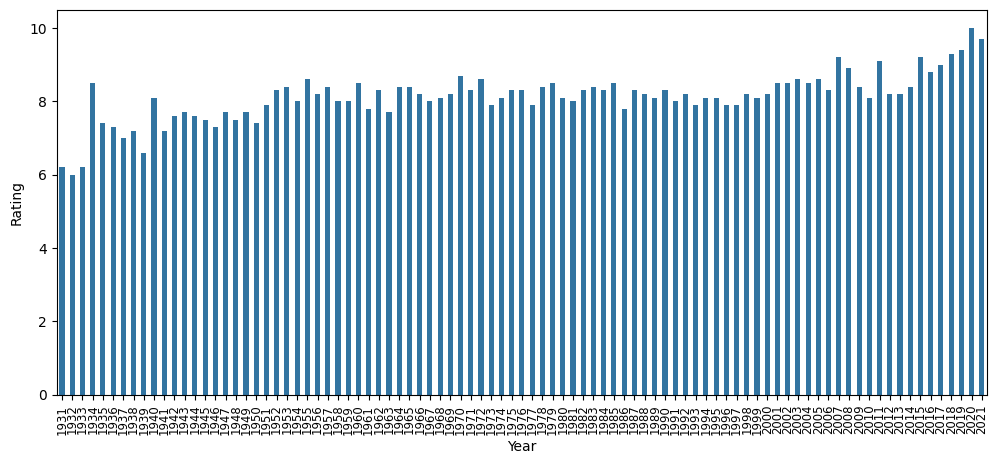

In [107]:
plt.figure(figsize=(12,5))
yearWise_plot = sns.barplot(
    x='Year', 
    y='Rating', 
    data=yearWisetop_5rat,
    width=0.5
)
yearWise_plot.set_xticklabels(yearWise_plot.get_xticklabels(), rotation=90, fontsize='small')
plt.show()

In [ ]:
# Year Wise Top Rated Movies

In [111]:
def sortYearWiseVat(df,col):
    return df.sort_values(by=col,ascending=False)[:1]

yearWisetop_5vot = df.groupby('Year').apply(sortYearWiseVat,'Votes')
yearWisetop_5vot

/var/folders/qf/9t7krrts2nbf4_6v5l4bwcxr0000gn/T/ipykernel_1712/2466573872.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearWisetop_5vot = df.groupby('Year').apply(sortYearWiseVat,'Votes')


,,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Year,,,,,,,,,,,
1931,5144,The Light of the World,1931,124,"Drama, Fantasy",6.2,112,Ardeshir Irani,Master Vithal,Zubeida,Jillo
1932,2293,Indrasabha,1932,211,"Musical, Romance",6.0,12,J.J. Madan,Nissar,Jehanara Kajjan,Abdul Rehman Kabuli
1933,1736,Fate,1933,68,"Drama, Romance",6.2,12,John Hunt,Devika Rani,Himanshu Rai,Abraham Sofaer
1934,4021,Piya Pyare,1934,144,"Adventure, Fantasy",2.7,11,R.S. Choudhury,Ruby Mayer,Dinshaw Bilimoria,Jillo
1935,2299,Inquilab,1935,144,Drama,7.4,38,Debaki Bose,Durga Khote,Prithviraj Kapoor,Syed Mohammed
...,...,...,...,...,...,...,...,...,...,...,...
2017,4202,Raees,2017,143,"Action, Crime, Drama",6.8,41441,Rahul Dholakia,Raj Arjun,Shubham Chintamani,Shubham Tukaram
2018,424,Andhadhun,2018,139,"Crime, Drama, Music",8.2,77901,Sriram Raghavan,Ayushmann Khurrana,Tabu,Radhika Apte
2019,1122,Chhichhore,2019,143,"Comedy, Drama",8.3,38581,Nitesh Tiwari,Sushant Singh Rajput,Shraddha Kapoor,Varun Sharma


/var/folders/qf/9t7krrts2nbf4_6v5l4bwcxr0000gn/T/ipykernel_1712/3380872678.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  yearWise_plot.set_xticklabels(yearWise_plot.get_xticklabels(), rotation=90, fontsize='small')


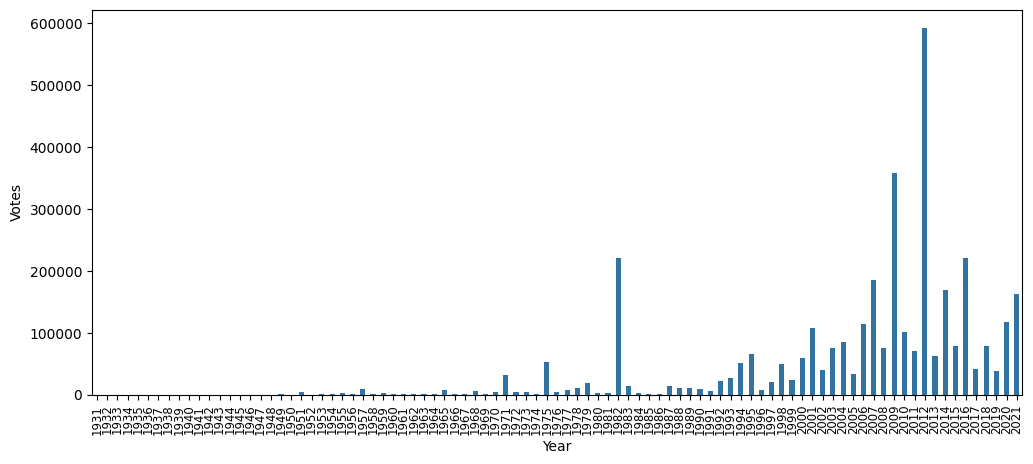

In [110]:
plt.figure(figsize=(12,5))
yearWise_plot = sns.barplot(
    x='Year', 
    y='Votes', 
    data=yearWisetop_5vot,
    width=0.5
)
yearWise_plot.set_xticklabels(yearWise_plot.get_xticklabels(), rotation=90, fontsize='small')
plt.show()

In [ ]:
# Year Wise Top Voted Movies